# Audio Classification

In [1]:
!pip install librosa

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename='UrbanSound8K/dog_bark.wav'

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

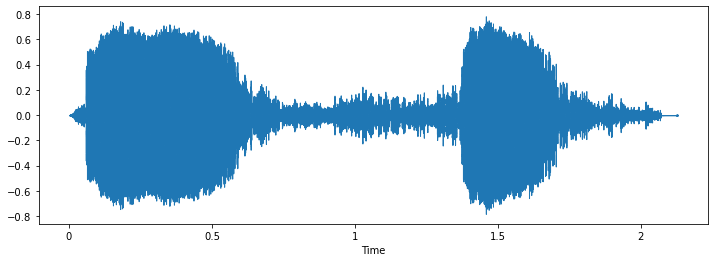

In [6]:
#Dog Sound
plt.figure(figsize=(12,4))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

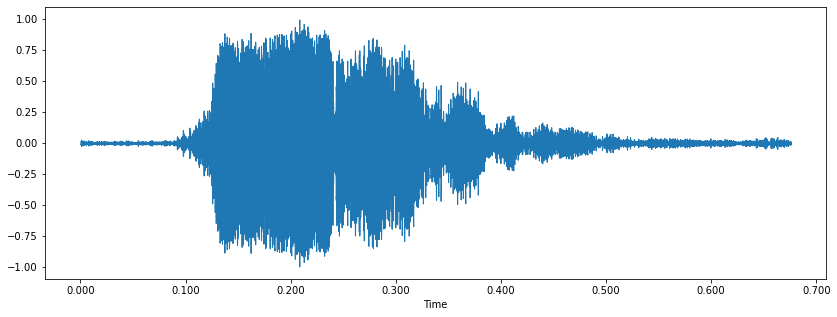

In [7]:
#Dog Sound 2
filename='UrbanSound8K/dog_bark2.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [8]:
sample_rate

22050

In [9]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [10]:
wave_sample_rate

48000

In [11]:
wave_audio

array([20763392, 21505024, 19742720, ..., 19752960, 16836608,  9976320],
      dtype=int32)

In [12]:
data

array([0.00680135, 0.01018938, 0.01043097, ..., 0.00689504, 0.00872626,
       0.00568424], dtype=float32)

In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [15]:
#Check whether the dataset is imbalanced
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

# Audio Classification Data Preprocessing

In [16]:
#Read Sample Audio Using Librosa
import librosa
audio_file_path='UrbanSound8K/dog_bark2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [17]:
print(librosa_audio_data)

[0.00680135 0.01018938 0.01043097 ... 0.00689504 0.00872626 0.00568424]


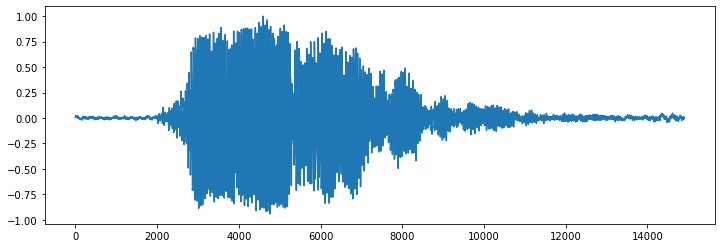

In [18]:
#Plot The Librosa Audio Data
import matplotlib.pyplot as plt
#Original Audio With 1 Channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

# Observation
  The Librosa Converts The Signal To Mono(Channel will Alays Be 1) 

In [19]:
#Read With Scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio= wav.read(audio_file_path)

In [20]:
wave_audio

array([20763392, 21505024, 19742720, ..., 19752960, 16836608,  9976320],
      dtype=int32)

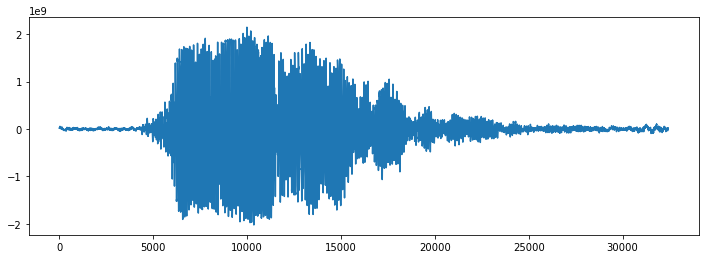

In [21]:
import matplotlib.pyplot as plt

#Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# Extract Features

We will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to
analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [22]:
mfccs =librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 30)


In [23]:
mfccs

array([[-355.33145   , -342.21667   , -346.317     , ..., -293.90796   ,
        -265.85168   , -290.32532   ],
       [  83.483475  ,   89.030975  ,   86.66104   , ...,  108.918205  ,
         101.59519   ,   96.45118   ],
       [   9.535023  ,    4.2848196 ,    6.131946  , ...,   -7.2430525 ,
          -2.2713156 ,    3.2623677 ],
       ...,
       [  -0.44030905,   -1.3583637 ,   -1.5783446 , ...,    1.1322603 ,
          -1.0828444 ,   -4.0275626 ],
       [  -1.2478633 ,   -4.0718265 ,   -4.969099  , ...,   -6.817972  ,
          -3.5508132 ,   -4.947946  ],
       [   0.7700417 ,   -0.5020273 ,   -0.78265357, ...,   -6.6513433 ,
          -4.1818867 ,   -6.668778  ]], dtype=float32)

In [24]:
#Extracting MFCC'S For every audio file
import pandas as pd 
import os
import librosa
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv') 
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [25]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [26]:
!pip install resampy

In [27]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np
from tqdm import tqdm
#Now we iterate through every audio file and extract features
#Using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name= os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_lables=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_lables])

3553it [02:25, 24.37it/s]/Users/ishitsubhram/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [05:31, 34.70it/s]/Users/ishitsubhram/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/Users/ishitsubhram/opt/anaconda3/envs/testenv/lib/python3.11/site-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [05:46, 25.18it/s]


In [29]:
#Converting extracted_features to Pandas dataframe 
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.52066, 52.00812, -...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [30]:
#Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist()) 
y=np.array(extracted_features_df['class'].tolist())

In [31]:
X.shape

(8732, 40)

In [32]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [33]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

2023-08-02 17:33:45.869079: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
import numpy as np

# Assuming 'y' is your 2-dimensional array
y_flattened = y.flatten()
print(y_flattened)

[0. 0. 0. ... 0. 0. 0.]


In [36]:
y.shape

(8732, 10)

In [37]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [38]:
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
         3.2466526e+00, -1.3690237e+00,  2.7557545e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927337e+00, ...,
        -3.2530508e+00, -5.2774529e+00, -1.5569714e+00],
       [-4.9871544e+01,  2.6535299e-01, -2.0500937e+01, ...,
         2.8545945e+00, -1.6092046e+00,  3.5248058e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293974e+00, ...,
         7.4264139e-01,  7.3349088e-01,  7.1100914e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515518e+01, ...,
         1.4681193e+00, -2.0091701e+00, -8.8218188e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906609e+00, ...,
        -5.3888674e+00, -3.3713608e+00, -1.5665115e+00]], dtype=float32)

In [39]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
import numpy as np

# Assuming 'y' is your 2-dimensional array
y_flattened = y.flatten()
print(y_flattened)

[0. 0. 0. ... 0. 0. 0.]


In [41]:
X_train.shape

(6985, 40)

In [42]:
X_test.shape

(1747, 40)

In [43]:
y_train.shape

(6985, 10)

In [44]:
y_test.shape

(1747, 10)

# Model Creation

In [45]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
import tensorflow as tf
print(tf.__version__)

2.12.1


In [47]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [49]:
#No. of Classes
num_labels= y.shape[1]

In [50]:
model=Sequential() 
#First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
#Second layer 
model.add(Dense(200)) 
model.add(Activation('relu'))
model.add(Dropout(0.5))
#Third layer 
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [52]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [94]:
# Trianing My Model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime


num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved _models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)

start= datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs,validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time:", duration)

Epoch 1/100
196/219 [=========================>....] - ETA: 0s - loss: 0.8096 - accuracy: 0.7285
Epoch 1: val_loss improved from inf to 0.70023, saving model to saved _models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.8130 - accuracy: 0.7281 - val_loss: 0.7002 - val_accuracy: 0.7871
Epoch 2/100
175/219 [======================>.......] - ETA: 0s - loss: 0.8275 - accuracy: 0.7164
Epoch 2: val_loss improved from 0.70023 to 0.67810, saving model to saved _models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.8156 - accuracy: 0.7204 - val_loss: 0.6781 - val_accuracy: 0.7951
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 0.8284 - accuracy: 0.7336
Epoch 3: val_loss improved from 0.67810 to 0.67605, saving model to saved _models/audio_classification.hdf5
219/219 [==============================] - 0s 1ms/step - loss: 0.8257 - accuracy: 0.7339 - val_loss: 0.6761 - val_accuracy: 0.7

219/219 [==============================] - 0s 1ms/step - loss: 0.8132 - accuracy: 0.7251 - val_loss: 0.6637 - val_accuracy: 0.7911
Epoch 29/100
208/219 [===========================>..] - ETA: 0s - loss: 0.7943 - accuracy: 0.7315
Epoch 29: val_loss did not improve from 0.63787
219/219 [==============================] - 0s 1ms/step - loss: 0.7904 - accuracy: 0.7323 - val_loss: 0.6468 - val_accuracy: 0.7974
Epoch 30/100
209/219 [===========================>..] - ETA: 0s - loss: 0.7912 - accuracy: 0.7359
Epoch 30: val_loss did not improve from 0.63787
219/219 [==============================] - 0s 1ms/step - loss: 0.7920 - accuracy: 0.7353 - val_loss: 0.6643 - val_accuracy: 0.8048
Epoch 31/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8036 - accuracy: 0.7316
Epoch 31: val_loss did not improve from 0.63787
219/219 [==============================] - 0s 1ms/step - loss: 0.8023 - accuracy: 0.7319 - val_loss: 0.6530 - val_accuracy: 0.8019
Epoch 32/100
209/219 [================

206/219 [===========================>..] - ETA: 0s - loss: 0.8009 - accuracy: 0.7341
Epoch 58: val_loss did not improve from 0.63787
219/219 [==============================] - 0s 1ms/step - loss: 0.8054 - accuracy: 0.7337 - val_loss: 0.6604 - val_accuracy: 0.7985
Epoch 59/100
196/219 [=========================>....] - ETA: 0s - loss: 0.8044 - accuracy: 0.7305
Epoch 59: val_loss did not improve from 0.63787
219/219 [==============================] - 4s 20ms/step - loss: 0.7966 - accuracy: 0.7337 - val_loss: 0.6503 - val_accuracy: 0.8002
Epoch 60/100
208/219 [===========================>..] - ETA: 0s - loss: 0.8067 - accuracy: 0.7311
Epoch 60: val_loss did not improve from 0.63787
219/219 [==============================] - 0s 1ms/step - loss: 0.8059 - accuracy: 0.7304 - val_loss: 0.6505 - val_accuracy: 0.7928
Epoch 61/100
209/219 [===========================>..] - ETA: 0s - loss: 0.8075 - accuracy: 0.7336
Epoch 61: val_loss did not improve from 0.63787
219/219 [==========================

219/219 [==============================] - 0s 1ms/step - loss: 0.7896 - accuracy: 0.7369 - val_loss: 0.6714 - val_accuracy: 0.7831
Epoch 88/100
208/219 [===========================>..] - ETA: 0s - loss: 0.8029 - accuracy: 0.7362
Epoch 88: val_loss did not improve from 0.63744
219/219 [==============================] - 0s 1ms/step - loss: 0.8015 - accuracy: 0.7359 - val_loss: 0.6622 - val_accuracy: 0.7905
Epoch 89/100
210/219 [===========================>..] - ETA: 0s - loss: 0.7851 - accuracy: 0.7424
Epoch 89: val_loss did not improve from 0.63744
219/219 [==============================] - 0s 1ms/step - loss: 0.7820 - accuracy: 0.7429 - val_loss: 0.6597 - val_accuracy: 0.7956
Epoch 90/100
210/219 [===========================>..] - ETA: 0s - loss: 0.8223 - accuracy: 0.7287
Epoch 90: val_loss did not improve from 0.63744
219/219 [==============================] - 0s 1ms/step - loss: 0.8169 - accuracy: 0.7300 - val_loss: 0.7079 - val_accuracy: 0.7785
Epoch 91/100
212/219 [================

In [95]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8093875050544739


In [55]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict(prediction_feature)

1/1 [==============================] - 0s 57ms/step


array([[4.0597987e-04, 4.7335997e-01, 2.6419454e-03, 5.4865528e-02,
        5.3994484e-02, 8.5236848e-04, 9.5722335e-04, 1.6818650e-02,
        6.0917536e-04, 3.9549464e-01]], dtype=float32)

In [56]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [57]:
prediction_feature

array([[-315.6028    ,   94.854805  ,  -37.22234   ,   46.778263  ,
          -6.728693  ,   10.012548  ,   -1.6075528 ,   18.511341  ,
         -11.9006195 ,    7.594035  ,   -7.8546596 ,   11.362423  ,
         -15.617317  ,    3.3019912 ,  -11.958161  ,    6.35349   ,
          -5.5870256 ,   20.78539   ,   -0.46922824,    6.0436325 ,
         -11.61955   ,    2.8686748 ,  -10.176432  ,    8.332485  ,
           1.776561  ,    2.5638971 ,  -14.761059  ,    1.1465563 ,
           3.783566  ,    3.109465  ,  -12.185813  ,   -3.0522914 ,
           3.7284143 ,    8.962752  ,    0.9306449 ,    3.1800797 ,
           2.485049  ,    0.6138646 ,  -11.449189  ,   -6.0105853 ]],
      dtype=float32)

In [58]:
prediction_feature.shape

(1, 40)

In [59]:
X_test[1]

array([-466.17957  ,    1.0950255,  -34.013893 ,   35.33935  ,
        -14.881481 ,  -19.12843  ,   -0.581684 ,  -16.130579 ,
        -21.339075 ,    7.673635 ,  -29.164494 ,  -18.950253 ,
         -2.9579992,   -8.16233  ,  -15.153101 ,   -6.6048055,
         -7.568598 ,    9.340647 ,   14.4331   ,   21.934181 ,
         20.861397 ,    1.3340122,  -19.228804 ,   -4.630231 ,
         -1.0564744,    3.2152667,   -6.984281 ,  -16.414577 ,
        -10.0286455,   13.009956 ,    0.5334609,  -23.843391 ,
        -15.267321 ,    9.245734 ,   10.367627 ,   -0.5832011,
         -1.2624053,   17.700016 ,   13.847463 ,   -5.1862826],
      dtype=float32)

In [60]:
model.predict(X_test)

55/55 [==============================] - 0s 630us/step


array([[1.26157620e-03, 5.54802653e-04, 5.87665103e-03, ...,
        7.73652573e-07, 1.59583215e-04, 3.57780941e-02],
       [3.00603880e-08, 2.73341051e-04, 2.63224877e-02, ...,
        6.68099907e-13, 5.73717849e-03, 2.50331825e-04],
       [1.53784025e-02, 2.97452733e-02, 5.83154894e-02, ...,
        1.10161811e-01, 3.89759522e-03, 9.56501141e-02],
       ...,
       [6.31871044e-09, 9.12351847e-01, 3.55104157e-06, ...,
        2.92748382e-07, 1.22649753e-05, 7.92205930e-02],
       [1.93009228e-01, 1.16252974e-02, 2.92786658e-01, ...,
        1.22875124e-02, 2.16704383e-02, 2.71402448e-01],
       [1.05009735e-01, 2.01689750e-02, 2.17837632e-01, ...,
        3.59805650e-03, 4.04256620e-02, 1.91155389e-01]], dtype=float32)

In [61]:
prediction_feature.reshape(-1,1)

array([[-315.6028    ],
       [  94.854805  ],
       [ -37.22234   ],
       [  46.778263  ],
       [  -6.728693  ],
       [  10.012548  ],
       [  -1.6075528 ],
       [  18.511341  ],
       [ -11.9006195 ],
       [   7.594035  ],
       [  -7.8546596 ],
       [  11.362423  ],
       [ -15.617317  ],
       [   3.3019912 ],
       [ -11.958161  ],
       [   6.35349   ],
       [  -5.5870256 ],
       [  20.78539   ],
       [  -0.46922824],
       [   6.0436325 ],
       [ -11.61955   ],
       [   2.8686748 ],
       [ -10.176432  ],
       [   8.332485  ],
       [   1.776561  ],
       [   2.5638971 ],
       [ -14.761059  ],
       [   1.1465563 ],
       [   3.783566  ],
       [   3.109465  ],
       [ -12.185813  ],
       [  -3.0522914 ],
       [   3.7284143 ],
       [   8.962752  ],
       [   0.9306449 ],
       [   3.1800797 ],
       [   2.485049  ],
       [   0.6138646 ],
       [ -11.449189  ],
       [  -6.0105853 ]], dtype=float32)

In [62]:
prediction_feature.reshape(1,-1).shape

(1, 40)

# Testing Some Test Audio Data

Steps

#Preprocess the new audio data
#predict the classes
#Invere transform your Predicted Label

In [120]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

# Load the audio file
filename = "UrbanSound8K/car_sound.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 

# Extract MFCC features
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Assuming you have a pre-trained model that can predict the class probabilities
# Make sure to replace 'saved_models/audio_classification.hdf5' with the actual path to your saved model
checkpointer = ModelCheckpoint(filepath='saved _models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
# Predict class probabilities
predicted_probabilities = model.predict(mfccs_scaled_features)
print(predicted_probabilities)

# Assuming you have a LabelEncoder fitted to your training data
# Make sure to replace 'labelencoder' with the actual instance of your LabelEncoder
labelencoder = LabelEncoder()

# Load the label encoder with the fitted classes from training data
# For example, if 'classes' is the array of class labels from your training data:
classes = ['drilling', 'car_horn', 'children_playing', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'dog_bark']  # Replace with your actual class labels
labelencoder.classes_ = np.array(classes)


# Get the index of the maximum probability (predicted class)
predicted_index = np.argmax(predicted_probabilities, axis=1)

# Use the index to obtain the predicted class label
prediction_class = labelencoder.inverse_transform(predicted_index)
print(prediction_class)

[-291.45013     -39.137825    -27.722555     54.108437    -15.824383
  -27.571959      7.465624     38.34415     -32.75779      11.537029
    6.5502863     9.543016    -15.620421     14.610064     -7.1597433
   -2.0536122   -11.123625      6.1881266     4.8661366    32.95617
   41.619408     43.675163     24.604755     12.073037    -11.739121
    3.3228018     5.4647236    11.999136     -3.1256564    -4.0890985
   -7.4190397     6.1438336     4.884043      5.765777    -15.018265
   -9.026411     -2.5035913     0.52447724   -2.25699       7.3285747 ]
[[-291.45013     -39.137825    -27.722555     54.108437    -15.824383
   -27.571959      7.465624     38.34415     -32.75779      11.537029
     6.5502863     9.543016    -15.620421     14.610064     -7.1597433
    -2.0536122   -11.123625      6.1881266     4.8661366    32.95617
    41.619408     43.675163     24.604755     12.073037    -11.739121
     3.3228018     5.4647236    11.999136     -3.1256564    -4.0890985
    -7.4190397     6.14